# Parcial - José David Jayk Vanegas

# Librerías

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

# Entradas conocidas

Probabilidad de que sea hombre o mujer:
- Probabilidad de que una mujer abra la puerta 80%
- Probabilidad de que un hombre abra la puerta 20%

Muejeres que abren la puerta:
- 70% hace donación
- 30% no hace donación

Hombres que abren la puerta:
- 40% hace donación
- 60% no hace donación

In [20]:
# Cantidad de dinero que aportan las mujeres
mu_M = 20
sigma_M = 3

x_M = np.linspace(mu_M - 4*sigma_M, mu_M + 4*sigma_M, 1000)
pdf_M = norm.pdf(x_M, mu_M, sigma_M) 
cdf_M = norm.cdf(x_M, mu_M, sigma_M)


# Cantidad de dinero que aportan los hombres
mu_H = 10
sigma_H = 2

x_H = np.linspace(mu_H - 4*sigma_H, mu_H + 4*sigma_H, 1000)
pdf_H = norm.pdf(x_H, mu_H, sigma_H)
cdf_H = norm.cdf(x_H, mu_H, sigma_H)

# Modelo para la simulación

### Punto a

In [21]:
ganancias_por_visita = []

for _ in range(1000):
    if np.random.rand() <= 0.8:
        if np.random.rand() <= 0.7:
            dinero_M = norm.rvs(mu_M, sigma_M)
            ganancias_por_visita.append(dinero_M)
        else:
            ganancias_por_visita.append(0)

    else:
        if np.random.rand() <= 0.4:
            dinero_H = norm.rvs(mu_H, sigma_H)
            ganancias_por_visita.append(dinero_H)
        else:
            ganancias_por_visita.append(0)

# Histograma de la contribución que la Heart Association puede esperar recibir cuando alguien abre la puerta

### Punto b

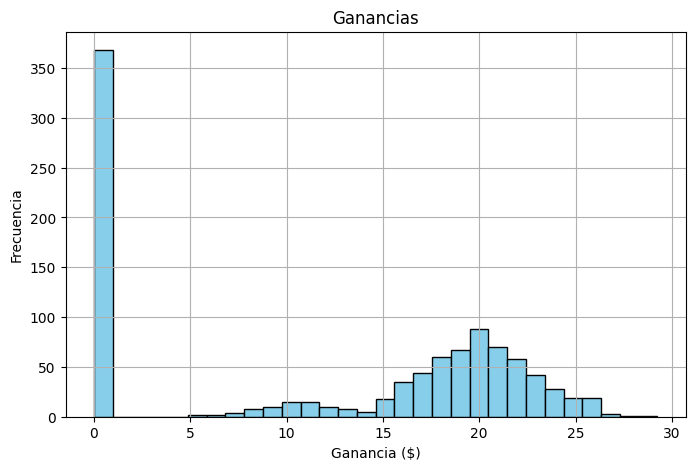

In [22]:
# Histograma de las ganancias
plt.figure(figsize=(8, 5))
plt.hist(ganancias_por_visita, bins=30, color="skyblue", edgecolor='black')
plt.title("Ganancias")
plt.xlabel("Ganancia ($)")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()


# Contribución promedio que la Heart Association puede esperar recibir cuando alguien abre la puerta y Probabilidad de que la contribución cuando alguien abra la puerta sea superior $21


### Punto c y e

In [23]:
ganancias = np.array(ganancias_por_visita)
ganancia_promedio = np.mean(ganancias)
print(f"Ganancia promedio cuando alguien abre la puerta: ${ganancia_promedio:.2f}")

# Probabilidad de que la ganancia sea mayor a $21
probabilidad = np.mean(ganancias > 21)
print(f"Probabilidad de que la ganancia sea mayor a $21: {probabilidad:.2%}")

Ganancia promedio cuando alguien abre la puerta: $12.00
Probabilidad de que la ganancia sea mayor a $21: 20.10%


# Cuando hay 300 visitas y el 25% de las personas no está en casa

### Punto d

Monto total que la Asociación del Corazón puede esperar recibir en donaciones: $2702.29


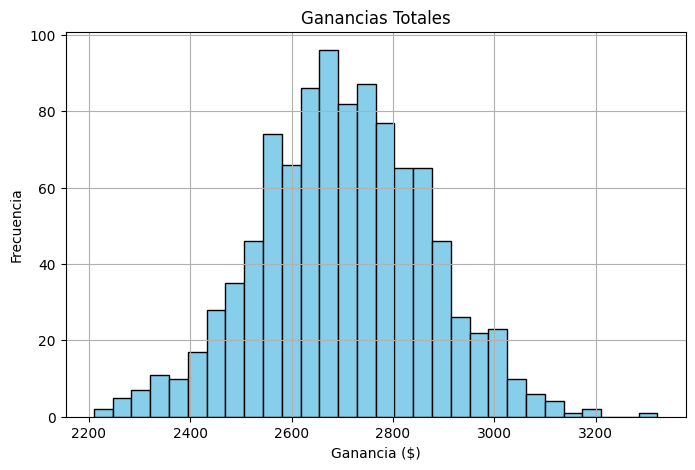

In [24]:
ganancias_por_visita = []
ganacias_totales = []

for _ in range(1000):
    for _ in range(300):
        if np.random.rand() <= 0.25:
            ganancias_por_visita.append(0)
        else:
            if np.random.rand() <= 0.8:
                if np.random.rand() <= 0.7:
                    dinero_M = norm.rvs(mu_M, sigma_M)
                    ganancias_por_visita.append(dinero_M)
                else:
                    ganancias_por_visita.append(0)

            else:
                if np.random.rand() <= 0.4:
                    dinero_H = norm.rvs(mu_H, sigma_H)
                    ganancias_por_visita.append(dinero_H)
                else:
                    ganancias_por_visita.append(0)
   
    suma_de_ganacias = np.sum(ganancias_por_visita)
    ganacias_totales.append(suma_de_ganacias)
    ganancias_por_visita = []

  
ganancias_totales = np.array(ganacias_totales)
ganancia_promedio = np.mean(ganancias_totales)
print(f"Monto total que la Asociación del Corazón puede esperar recibir en donaciones: ${ganancia_promedio:.2f}")

# Histograma de las ganancias
plt.figure(figsize=(8, 5))
plt.hist(ganancias_totales, bins=30, color="skyblue", edgecolor='black')
plt.title("Ganancias Totales")
plt.xlabel("Ganancia ($)")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()
